In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [52]:
x = y_train == 5
x.sum()

5421

In [40]:
x_train = x_train.reshape((-1,28,28,1)) / .255
x_test = x_test.reshape((-1,28,28,1)) / .255

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


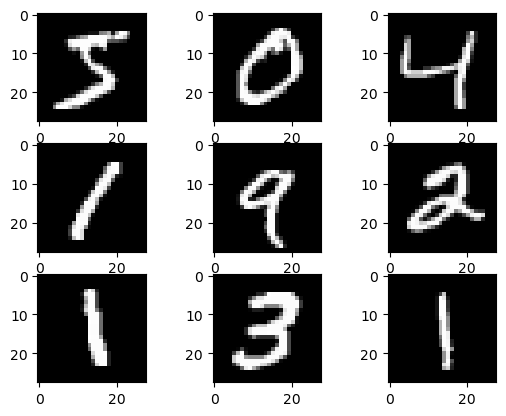

In [63]:

# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [22]:
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_range_val=45
zoom_range_val=[0.5,1.5]

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = rotation_range_val,
    width_shift_range = width_shift_val,
    height_shift_range = height_shift_val,
    zoom_range=zoom_range_val,)

x_transormed = datagen.flow(x_train)

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',  kernel_regularizer=  'L2'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = 'L2'),
    tf.keras.layers.Dense(10)
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [33]:
model.fit(datagen.flow(x_train[0:55000], y_train[0:55000]), batch_size=64, epochs= 20, validation_data=datagen.flow(x_train[55000:60000], y_train[55000:60000]))

Epoch 1/20
1719/1719 [==============================] - 155s 90ms/step - loss: 4.3606 - sparse_categorical_accuracy: 0.4566 - val_loss: 2.2862 - val_sparse_categorical_accuracy: 0.7184
Epoch 2/20
1719/1719 [==============================] - 149s 87ms/step - loss: 1.7170 - sparse_categorical_accuracy: 0.7413 - val_loss: 1.2389 - val_sparse_categorical_accuracy: 0.8240
Epoch 3/20
1719/1719 [==============================] - 158s 92ms/step - loss: 1.1218 - sparse_categorical_accuracy: 0.7943 - val_loss: 0.8583 - val_sparse_categorical_accuracy: 0.8724
Epoch 4/20
1719/1719 [==============================] - 144s 84ms/step - loss: 0.9269 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.8780 - val_sparse_categorical_accuracy: 0.8420
Epoch 5/20
1719/1719 [==============================] - 122s 71ms/step - loss: 0.8402 - sparse_categorical_accuracy: 0.8257 - val_loss: 0.8088 - val_sparse_categorical_accuracy: 0.8660
Epoch 6/20
1719/1719 [==============================] - 124s 72ms/step - lo

KeyboardInterrupt: 

In [34]:
model.save('2cnramodel.h5')


In [41]:
test =  model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3929 - sparse_categorical_accuracy: 0.9556


In [42]:
test

[0.3929436206817627, 0.9556000232696533]

In [45]:
n_model = tf.keras.models.load_model('../server/ModelFiles/2cnramodel.h5')

In [46]:
prediction = n_model.predict(x_test)

313/313 [==============================] - 5s 14ms/step


In [95]:
prediction.shape

(10000, 10)

In [47]:
import numpy as np
prediction_arg = np.argmax(prediction,axis=1)

<AxesSubplot:>

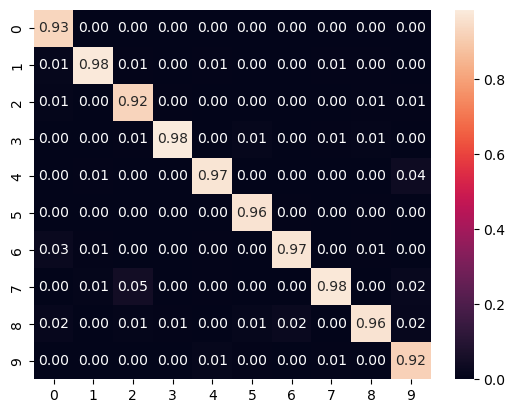

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, prediction_arg, normalize='pred'), annot=True, fmt='.2f')

In [59]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, prediction_arg)

In [62]:
import pandas as pd

df = pd.DataFrame({'Precision':precision, 'Recall': recall,'F1': f1})

df

,Precision,Recall,F1
0,0.927481,0.991837,0.958580
1,0.976848,0.966520,0.971656
2,0.924144,0.968023,0.945575
3,0.983806,0.962376,0.972973
4,0.966632,0.943992,0.955178
5,0.963656,0.980942,0.972222
6,0.965885,0.945720,0.955696
7,0.975104,0.914397,0.943775
8,0.962039,0.910678,0.935654
9,0.917680,0.972250,0.944177
